<IPython.core.display.Javascript object>


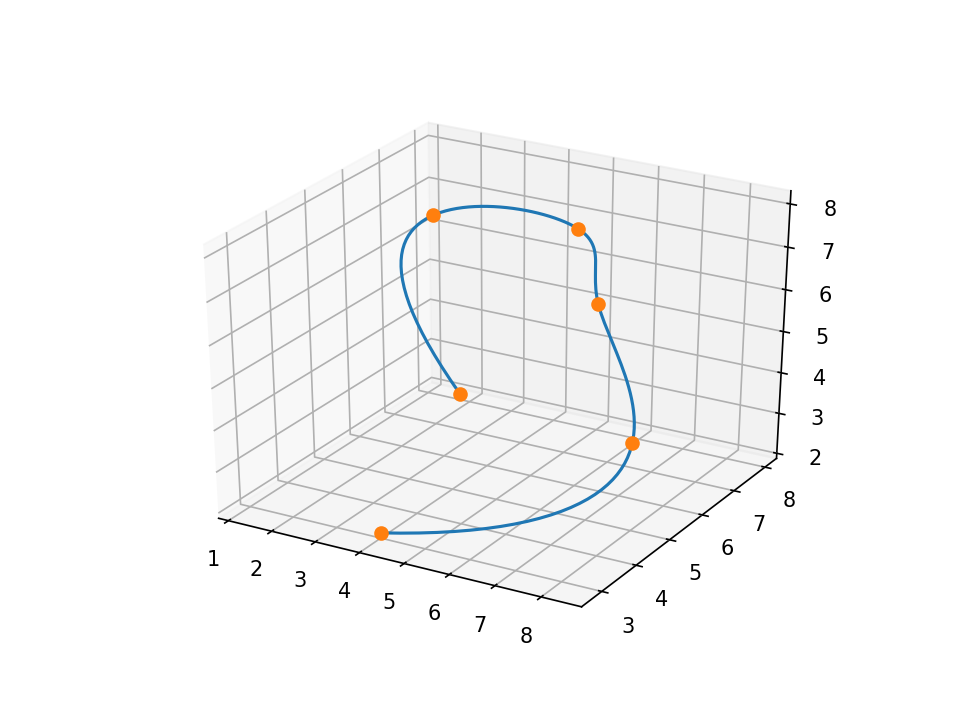

arc length 25.521295161266462
(error) 3.5925396991111187e-08


<IPython.core.display.Javascript object>


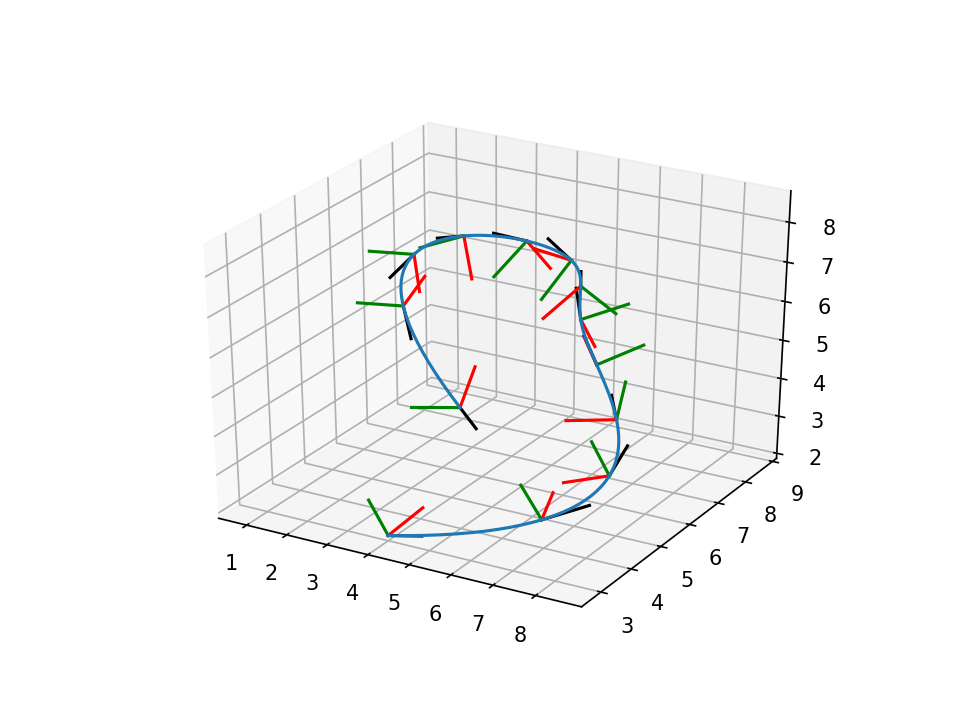

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

ti = [0,1,2,3,4,5]
xi = [4,8,5,6,2,5]
yi = [3,5,8,6,7,4]
zi = [2,4,5,8,7,5]

from scipy.interpolate import UnivariateSpline
f = UnivariateSpline(ti,xi,s=0)
g = UnivariateSpline(ti,yi,s=0)
h = UnivariateSpline(ti,zi,s=0)

t = np.linspace(ti[0],ti[-1],129)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(f(t),g(t),h(t)) # plot the smooth curve
ax.plot(xi,yi,zi,'o')   # plot the data points

plt.show()

# Define functions describing the position, velocity and acceleration vectors
r = lambda t:np.array([f(t),g(t),h(t)]).T
dfdt = f.derivative()
dgdt = g.derivative()
dhdt = h.derivative()
v = lambda t:np.array([dfdt(t),dgdt(t),dhdt(t)]).T
d2fdt2 = dfdt.derivative()
d2gdt2 = dgdt.derivative()
d2hdt2 = dhdt.derivative()
a = lambda t:np.array([d2fdt2(t),d2gdt2(t),d2hdt2(t)]).T

# Set up a function to calculate the 'speed' along the curve, i.e. ||v(t)||
speed = lambda t:np.linalg.norm(v(t),axis=-1)

# Integrate over the speed to get the arc length
from scipy.integrate import quad
arc_length,error = quad(speed,ti[0],ti[-1])
print('arc length',arc_length)
print('(error)',error)

# At a small number of t values, we'll calculate and plot the
# unit tangent, principal unit normal, and binormal vectors.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ts = np.linspace(t[0],t[-1],13) # small number of t values
for tk in ts:
    rk = r(tk)
    vk = v(tk)
    ak = a(tk)
    Tk = vk/np.linalg.norm(vk)
    Nk = ak*np.dot(vk,vk)-vk*np.dot(ak,vk)
    Nk /= np.linalg.norm(Nk)
    Bk = np.cross(Tk,Nk)
    ax.plot([rk[0],rk[0]+Tk[0]],[rk[1],rk[1]+Tk[1]],[rk[2],rk[2]+Tk[2]],'k-') # plot a unit tangent
    ax.plot([rk[0],rk[0]+Nk[0]],[rk[1],rk[1]+Nk[1]],[rk[2],rk[2]+Nk[2]],'r-') # plot the principal unit normal
    ax.plot([rk[0],rk[0]+Bk[0]],[rk[1],rk[1]+Bk[1]],[rk[2],rk[2]+Bk[2]],'g-') # plot the binormal
ax.plot(f(t),g(t),h(t)) # plot the smooth curve
plt.show()

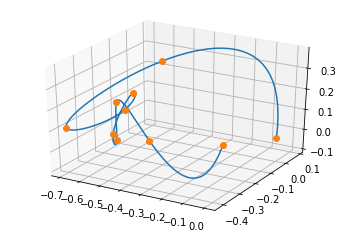

NameError: name 'z' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import UnivariateSpline
%matplotlib inline


ti = [0.0, 0.6 , 1.1 , 1.5 , 1.8 , 2.1 , 2.3 , 2.5 , 2.8 , 3.2 ]
xi = [0.0,-0.44,-0.69,-0.63,-0.62,-0.55,-0.63,-0.67,-0.44,-0.10]
yi = [0.0,-0.15,-0.41,-0.15,-0.11,-0.31,-0.20,-0.15,-0.23,-0.21]
zi = [0.0, 0.36, 0.11, 0.09, 0.16, 0.06,-0.04, 0.12, 0.01, 0.05]

f = UnivariateSpline(ti,xi,s=0)
g = UnivariateSpline(ti,yi,s=0)
h = UnivariateSpline(ti,zi,s=0)
t = np.linspace(ti[0],ti[-1],129)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(f(t),g(t),h(t))
ax.plot(xi,yi,zi,'o')
plt.show()
print("At t=2, {x, y, z] = [%d, %d, %d]" % (f(2), g(2), z(2)))